<a href="https://colab.research.google.com/github/aditya00kumar/data-science-with-python/blob/master/Perceptron_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

**Create dataset**

In [0]:
n_points = 100
centers = [[-0.5,0.5], [0.5,-0.5]]
X,y = datasets.make_blobs(n_samples=n_points, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.tensor(X)
y_data = torch.tensor(y.reshape(100,1))

In [27]:
y_data

tensor([[0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [0]:
x_data, y_data = x_data.to(device), y_data.to(device)

In [30]:
x_data.shape

torch.Size([100, 2])

In [0]:
def plot_scatter():
  plt.scatter(X[y==0, 0], X[y==0,1])
  plt.scatter(X[y==1, 0], X[y==1,1])

**Plot scatter data**

In [0]:
def scatter_plot():
  plt.scatter()

**Model**

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

In [0]:
torch.manual_seed(2)
model = Model(input_size=2, output_size=1)

In [35]:
model.to(device)

Model(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [36]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1622, -0.1683]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1939], device='cuda:0', requires_grad=True)]

In [0]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]

In [0]:
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [39]:
get_params()

(0.16220331192016602, -0.1682732105255127, 0.19390898942947388)

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0]) 
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  

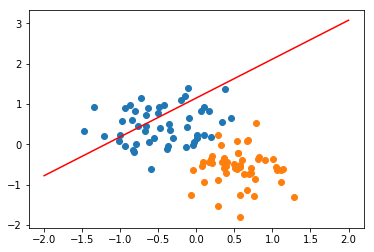

In [41]:
plot_scatter()
plot_fit('test')

In [0]:
criteria = nn.BCELoss() # binary cross entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr =0.01)

In [0]:
#model = model.double()

In [44]:
epochs = 100
losses = []
for i in range(epochs):
  #print(i)
  y_pred = model(x_data)
  loss = criteria(y_pred, y_data)
  print('Epoch:',i, "Loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  

RuntimeError: ignored

In [100]:
x_data.dtype

torch.float64